In [91]:
import os
# os.chdir(os.path.dirname(os.path.abspath(__file__)))
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle


In [102]:
music_dets_paths = [i for i in glob.glob(
    "../processed_data/detections/*") if not "_gt" in i and "music" in i and not "music_0013" in i]
music_gt_paths = [i + "_gt" for i in music_dets_paths]
music_gt_positions_paths = [
    i + "_gt_positions" for i in music_dets_paths]


In [106]:
a = pickle.load(open(music_gt_positions_paths[0], "rb"))


In [107]:
sender_size = 20

probs = []
inliers = []

for j in range(len(music_dets_paths)):
    dets = pickle.load(open(music_dets_paths[j], "rb"))
    gt = pickle.load(open(music_gt_paths[j], "rb"))
    gt_positions = pickle.load(open(music_gt_positions_paths[j], "rb"))
    # gt = np.load(music_gt_paths[j])
    # gt_positions = np.load(music_gt_positions_paths[j])

    n = dets.shape[2] // sender_size
    indx = np.random.permutation(dets.shape[2])[
        :(n * sender_size)].reshape((20, n))
    for i in range(n):
        temp = dets[:, :, indx[:, i]][np.tril_indices(dets.shape[0], k=-1)]
        temp2 = gt[:, :, indx[:, i]][np.tril_indices(dets.shape[0], k=-1)]
        # inlier if within of two dm ~= 60 samples
        inl = np.abs(temp - temp2) < 60
        probs.append(temp)
        inliers.append(inl)

problems = np.stack(probs, axis=0)
inlers = np.stack(inliers, axis=0)


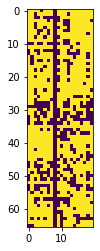

In [86]:
plt.imshow(inliers[5])
